<a href="https://colab.research.google.com/github/tady0725/machine_lr/blob/master/sun_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mL/sun/train.csv")
data.head(10)

,ID,Date,Temp_m,Generation,Irradiance,Capacity,Lat,Lon,Angle,Irradiance_m,Temp,Module
0,1,2020/6/9,NaN,630,8.37,499.8,25.11,121.26,22.0,2325,26.3,MM60-6RT-300
1,2,2020/6/10,NaN,2246,17.11,499.8,25.11,121.26,22.0,4753,27.9,MM60-6RT-300
2,3,2020/6/11,NaN,1147,12.26,499.8,25.11,121.26,22.0,3406,28.0,MM60-6RT-300
3,4,2020/6/12,NaN,2946,21.51,499.8,25.11,121.26,22.0,5975,28.6,MM60-6RT-300
4,5,2020/6/13,NaN,3139,23.18,499.8,25.11,121.26,22.0,6439,29.1,MM60-6RT-300
5,6,2020/6/14,NaN,2618,18.57,499.8,25.11,121.26,22.0,5158,28.3,MM60-6RT-300
6,7,2020/6/15,NaN,3093,27.04,499.8,25.11,121.26,22.0,7511,29.0,MM60-6RT-300
7,8,2020/6/16,NaN,3256,28.65,499.8,25.11,121.26,22.0,7958,29.3,MM60-6RT-300
8,9,2020/6/17,NaN,3280,28.63,499.8,25.11,121.26,22.0,7953,29.2,MM60-6RT-300
9,10,2020/6/18,NaN,3238,28.60,499.8,25.11,121.26,22.0,7944,29.4,MM60-6RT-300


In [2]:
data.shape

(3584, 12)

In [3]:
#check isnull
data.isnull().sum()

ID                 0
Date               0
Temp_m          1458
Generation         0
Irradiance        24
Capacity           0
Lat                0
Lon                0
Angle              0
Irradiance_m       0
Temp              15
Module             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3584 entries, 0 to 3583
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            3584 non-null   int64  
 1   Date          3584 non-null   object 
 2   Temp_m        2126 non-null   float64
 3   Generation    3584 non-null   int64  
 4   Irradiance    3560 non-null   float64
 5   Capacity      3584 non-null   float64
 6   Lat           3584 non-null   float64
 7   Lon           3584 non-null   float64
 8   Angle         3584 non-null   float64
 9   Irradiance_m  3584 non-null   int64  
 10  Temp          3569 non-null   float64
 11  Module        3584 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 336.1+ KB


In [5]:
data.describe()

,ID,Temp_m,Generation,Irradiance,Capacity,Lat,Lon,Angle,Irradiance_m,Temp
count,3584.00000,2126.000000,3584.000000,3560.000000,3584.000000,3584.000000,3584.000000,3584.000000,3.584000e+03,3569.000000
mean,1792.50000,42.596990,1339.483817,17.267764,350.535039,24.483453,120.759336,-20.575564,1.237700e+05,25.722808
std,1034.75601,10.953377,796.698529,6.819601,144.498892,0.482748,0.348226,53.058729,1.601834e+05,5.341206
min,1.00000,11.800000,17.000000,0.130000,99.200000,24.040000,120.440000,-160.000000,0.000000e+00,6.900000
25%,896.75000,34.000000,575.000000,13.170000,246.400000,24.080000,120.470000,-31.000000,5.367000e+03,22.000000
50%,1792.50000,42.500000,1268.000000,18.770000,352.000000,24.107000,120.520000,1.760000,6.668950e+04,28.200000
75%,2688.25000,51.700000,1957.000000,22.492500,498.560000,25.030000,121.080000,4.630000,1.717385e+05,30.000000
max,3584.00000,68.500000,6752.000000,28.820000,499.800000,25.110000,121.260000,22.000000,1.026617e+06,32.500000


In [6]:

lt=data['Lat'].unique()
ln=data['Lon'].unique()
print(lt)
print(ln)
copydata = data.copy()



[25.11  24.107 24.08  24.98  25.03  24.04  24.09  24.07  24.06 ]
[121.26 120.44 120.5  121.03 121.08 120.52 120.48 120.47]


In [7]:
copydata.drop(copydata.index,inplace=True)


In [8]:
print(copydata)
# temp isnull insert last one num


Empty DataFrame
Columns: [ID, Date, Temp_m, Generation, Irradiance, Capacity, Lat, Lon, Angle, Irradiance_m, Temp, Module]
Index: []


In [9]:
from numpy.ma.core import count
import time
for i in lt:
  for k in ln:
    codition1=((data['Lat']==i))
    codition2=((data['Lon']==k))
    data1=data[(codition1) & (codition2)]
    n=list(data1.shape)
    print(n[0])
    print("共有",sum(data1['Temp_m'].isnull()))
    

    print(i,k)
    # print(data1.describe())
    s=data1['Temp_m'].count()
    a=data1['Temp_m'].mean()
    print(s,a)


    if(n[0]==0):
      continue
    if(s==0):
      data1['Temp_m'].fillna(value=40, inplace=True)
    else:
      data1['Temp_m'].fillna(data1['Temp_m'].mean(),inplace=True)

    copydata = pd.concat([copydata, data1], ignore_index=True)
    print("合併df來新增資料")
    print(copydata)
    # time.sleep(10)



826
共有 826
25.11 121.26
0 nan
合併df來新增資料
       ID        Date  Temp_m  Generation  Irradiance  Capacity    Lat  \
0       1    2020/6/9    40.0         630        8.37     499.8  25.11   
1       2   2020/6/10    40.0        2246       17.11     499.8  25.11   
2       3   2020/6/11    40.0        1147       12.26     499.8  25.11   
3       4   2020/6/12    40.0        2946       21.51     499.8  25.11   
4       5   2020/6/13    40.0        3139       23.18     499.8  25.11   
..    ...         ...     ...         ...         ...       ...    ...   
821  3544  2021/10/26    40.0        1349       14.35     438.3  25.11   
822  3557  2021/10/27    40.0        1407       18.14     499.8  25.11   
823  3558  2021/10/27    40.0        1160       18.14     438.3  25.11   
824  3571  2021/10/28    40.0        1955       17.95     499.8  25.11   
825  3572  2021/10/28    40.0        1636       17.95     438.3  25.11   

        Lon  Angle  Irradiance_m  Temp        Module  
0    121.26   22

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

0
共有 0
25.03 120.5
0 nan
0
共有 0
25.03 121.03
0 nan
316
共有 316
25.03 121.08
0 nan
合併df來新增資料
        ID        Date  Temp_m  Generation  Irradiance  Capacity    Lat  \
0        1    2020/6/9    40.0         630        8.37     499.8  25.11   
1        2   2020/6/10    40.0        2246       17.11     499.8  25.11   
2        3   2020/6/11    40.0        1147       12.26     499.8  25.11   
3        4   2020/6/12    40.0        2946       21.51     499.8  25.11   
4        5   2020/6/13    40.0        3139       23.18     499.8  25.11   
...    ...         ...     ...         ...         ...       ...    ...   
2813  3518  2021/10/24    40.0         323        3.69     498.6  25.03   
2814  3532  2021/10/25    40.0         454        9.06     498.6  25.03   
2815  3546  2021/10/26    40.0        1846       17.40     498.6  25.03   
2816  3560  2021/10/27    40.0        2032       20.12     498.6  25.03   
2817  3574  2021/10/28    40.0        2092       20.48     498.6  25.03   

        

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

0
共有 0
24.06 121.26
0 nan
0
共有 0
24.06 120.44
0 nan
0
共有 0
24.06 120.5
0 nan
0
共有 0
24.06 121.03
0 nan
0
共有 0
24.06 121.08
0 nan
0
共有 0
24.06 120.52
0 nan
0
共有 0
24.06 120.48
0 nan
132
共有 0
24.06 120.47
132 43.29924242424242
合併df來新增資料
        ID        Date  Temp_m  Generation  Irradiance  Capacity    Lat  \
0        1    2020/6/9    40.0         630        8.37    499.80  25.11   
1        2   2020/6/10    40.0        2246       17.11    499.80  25.11   
2        3   2020/6/11    40.0        1147       12.26    499.80  25.11   
3        4   2020/6/12    40.0        2946       21.51    499.80  25.11   
4        5   2020/6/13    40.0        3139       23.18    499.80  25.11   
...    ...         ...     ...         ...         ...       ...    ...   
3579  3523  2021/10/24    25.5         817       10.72    314.88  24.06   
3580  3538  2021/10/25    40.9        1522       19.95    314.88  24.06   
3581  3552  2021/10/26    48.5        1210       17.00    314.88  24.06   
3582  3565  202

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [10]:
copydata

,ID,Date,Temp_m,Generation,Irradiance,Capacity,Lat,Lon,Angle,Irradiance_m,Temp,Module
0,1,2020/6/9,40.0,630,8.37,499.80,25.11,121.26,22.0,2325,26.3,MM60-6RT-300
1,2,2020/6/10,40.0,2246,17.11,499.80,25.11,121.26,22.0,4753,27.9,MM60-6RT-300
2,3,2020/6/11,40.0,1147,12.26,499.80,25.11,121.26,22.0,3406,28.0,MM60-6RT-300
3,4,2020/6/12,40.0,2946,21.51,499.80,25.11,121.26,22.0,5975,28.6,MM60-6RT-300
4,5,2020/6/13,40.0,3139,23.18,499.80,25.11,121.26,22.0,6439,29.1,MM60-6RT-300
...,...,...,...,...,...,...,...,...,...,...,...,...
3579,3523,2021/10/24,25.5,817,10.72,314.88,24.06,120.47,0.0,32213,23.2,AUO PM060MW3 320W
3580,3538,2021/10/25,40.9,1522,19.95,314.88,24.06,120.47,0.0,66121,24.7,AUO PM060MW3 320W
3581,3552,2021/10/26,48.5,1210,17.00,314.88,24.06,120.47,0.0,52008,26.9,AUO PM060MW3 320W
3582,3565,2021/10/27,36.7,1498,19.79,314.88,24.06,120.47,0.0,65558,25.4,AUO PM060MW3 320W


In [11]:
copydata.shape

(3584, 12)

In [12]:
copydata.isnull().sum()

ID               0
Date             0
Temp_m           0
Generation       0
Irradiance      24
Capacity         0
Lat              0
Lon              0
Angle            0
Irradiance_m     0
Temp            15
Module           0
dtype: int64

In [13]:
s=copydata['Module'].unique()

print(s)

for index,n in enumerate(s):
  print(index,n)
  copydata['Module'].replace(n,index,inplace=True)



['MM60-6RT-300' 'AUO PM060MW3 320W' 'AUO PM060MW3 325W' 'SEC-6M-60A-295']
0 MM60-6RT-300
1 AUO PM060MW3 320W
2 AUO PM060MW3 325W
3 SEC-6M-60A-295


In [14]:
copydata

,ID,Date,Temp_m,Generation,Irradiance,Capacity,Lat,Lon,Angle,Irradiance_m,Temp,Module
0,1,2020/6/9,40.0,630,8.37,499.80,25.11,121.26,22.0,2325,26.3,0
1,2,2020/6/10,40.0,2246,17.11,499.80,25.11,121.26,22.0,4753,27.9,0
2,3,2020/6/11,40.0,1147,12.26,499.80,25.11,121.26,22.0,3406,28.0,0
3,4,2020/6/12,40.0,2946,21.51,499.80,25.11,121.26,22.0,5975,28.6,0
4,5,2020/6/13,40.0,3139,23.18,499.80,25.11,121.26,22.0,6439,29.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3579,3523,2021/10/24,25.5,817,10.72,314.88,24.06,120.47,0.0,32213,23.2,1
3580,3538,2021/10/25,40.9,1522,19.95,314.88,24.06,120.47,0.0,66121,24.7,1
3581,3552,2021/10/26,48.5,1210,17.00,314.88,24.06,120.47,0.0,52008,26.9,1
3582,3565,2021/10/27,36.7,1498,19.79,314.88,24.06,120.47,0.0,65558,25.4,1


In [15]:
copydata['Irradiance'].mean()

17.267764044943817

In [16]:
# Irradiance isnull insert maen()
copydata['Irradiance'].fillna(copydata['Irradiance'].mean(),inplace=True)

In [17]:
copydata.isnull().sum()

ID               0
Date             0
Temp_m           0
Generation       0
Irradiance       0
Capacity         0
Lat              0
Lon              0
Angle            0
Irradiance_m     0
Temp            15
Module           0
dtype: int64

In [18]:
copydata['Temp'].fillna(method='ffill',inplace=True)

In [19]:
copydata.isnull().sum()

ID              0
Date            0
Temp_m          0
Generation      0
Irradiance      0
Capacity        0
Lat             0
Lon             0
Angle           0
Irradiance_m    0
Temp            0
Module          0
dtype: int64

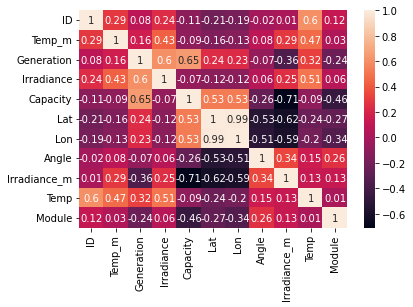

In [20]:
import seaborn as sns
martix =copydata.corr().round(2)
sns.heatmap(data=martix,annot =True)

In [21]:

df1 = copydata.copy()
df1.drop(['ID','Temp_m','Date','Generation','Lat','Lon','Angle','Module'], axis=1, inplace=True)

In [22]:
df1

,Irradiance,Capacity,Irradiance_m,Temp
0,8.37,499.80,2325,26.3
1,17.11,499.80,4753,27.9
2,12.26,499.80,3406,28.0
3,21.51,499.80,5975,28.6
4,23.18,499.80,6439,29.1
...,...,...,...,...
3579,10.72,314.88,32213,23.2
3580,19.95,314.88,66121,24.7
3581,17.00,314.88,52008,26.9
3582,19.79,314.88,65558,25.4


In [23]:
from sklearn.preprocessing import MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_norm = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)


In [24]:
df_norm

,Irradiance,Capacity,Irradiance_m,Temp
0,0.287208,1.000000,0.002265,0.757812
1,0.591844,1.000000,0.004630,0.820312
2,0.422795,1.000000,0.003318,0.824219
3,0.745207,1.000000,0.005820,0.847656
4,0.803416,1.000000,0.006272,0.867188
...,...,...,...,...
3579,0.369118,0.538392,0.031378,0.636719
3580,0.690833,0.538392,0.064407,0.695312
3581,0.588010,0.538392,0.050660,0.781250
3582,0.685256,0.538392,0.063858,0.722656


In [25]:
from sklearn import preprocessing
#建立RobustScaler物件
robust = preprocessing.RobustScaler()
# 資料標準化
data_rob = pd.DataFrame(robust.fit_transform(df1), columns=df1.columns)

In [26]:
data_rob

,Irradiance,Capacity,Irradiance_m,Temp
0,-1.117584,0.586136,-0.386872,-0.240506
1,-0.174757,0.586136,-0.372278,-0.037975
2,-0.697950,0.586136,-0.380375,-0.025316
3,0.299892,0.586136,-0.364933,0.050633
4,0.480043,0.586136,-0.362144,0.113924
...,...,...,...,...
3579,-0.864078,-0.147208,-0.207226,-0.632911
3580,0.131607,-0.147208,-0.003417,-0.443038
3581,-0.186624,-0.147208,-0.088245,-0.164557
3582,0.114347,-0.147208,-0.006801,-0.354430


In [27]:
df_norm

,Irradiance,Capacity,Irradiance_m,Temp
0,0.287208,1.000000,0.002265,0.757812
1,0.591844,1.000000,0.004630,0.820312
2,0.422795,1.000000,0.003318,0.824219
3,0.745207,1.000000,0.005820,0.847656
4,0.803416,1.000000,0.006272,0.867188
...,...,...,...,...
3579,0.369118,0.538392,0.031378,0.636719
3580,0.690833,0.538392,0.064407,0.695312
3581,0.588010,0.538392,0.050660,0.781250
3582,0.685256,0.538392,0.063858,0.722656


In [28]:
# train = copydata.copy()
# train=train.drop(columns=['ID','Generation','Date'])

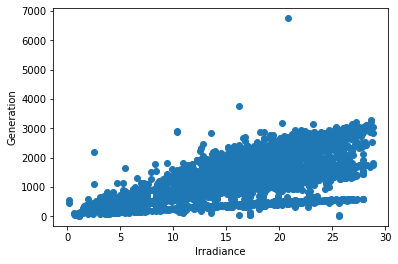

In [29]:
import matplotlib.pyplot as plt # 引入pyplot
target=copydata['Generation']
x = copydata['Irradiance'] 
y = target 

plt.xlabel("Irradiance") # x軸的標題
plt.ylabel("Generation") # y軸的標題
plt.scatter(x, y) # 繪製散點圖
plt.show() # 顯示圖形

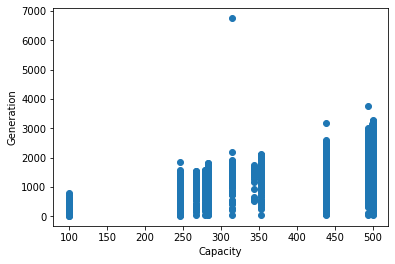

In [58]:
import matplotlib.pyplot as plt # 引入pyplot
target=copydata['Generation']
x = copydata['Capacity'] 
y = target 

plt.xlabel("Capacity") # x軸的標題
plt.ylabel("Generation") # y軸的標題
plt.scatter(x, y) # 繪製散點圖
plt.show() # 顯示圖形

In [30]:
import numpy as np
X = pd.DataFrame(np.c_[df1['Irradiance'], df1['Capacity'],df1['Irradiance_m'],df1['Temp']], columns = ['Irradiance','Capacity','Irradiance_m','Temp'])
Y = copydata['Generation']

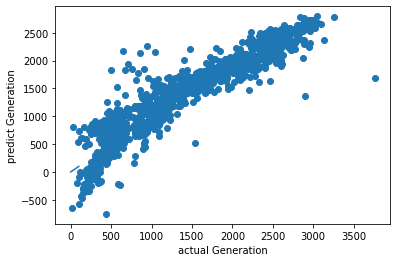

In [31]:
from sklearn.linear_model import LinearRegression # 引入LinearRegression
from sklearn.model_selection import train_test_split # 引入train_test_split
import matplotlib.pyplot as plt # 引入pyplot



x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1) # 將數據分成73比
lm = LinearRegression()
lm.fit(x_train, y_train) # 將資料拿去訓練

y_predict = lm.predict(x_test) # 北test的資料用訓練出來的模型去預測

plt.xlabel("actual Generation") # x軸的標題
plt.ylabel("predict Generation") # y軸的標題
plt.plot([0,100], [0,100] ) # 劃一條基準線
plt.scatter(y_test, y_predict) # 比對預測跟實際的差別
plt.show() # 察看結果

In [32]:
lm.score(x_test, y_test)

0.8498602333147335

In [33]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = (np.sqrt(mean_squared_error(y_test, y_predict)))
print(rmse)

314.39322694327655


In [34]:
lm.intercept_

-1404.618664766231

In [35]:
lm.coef_

array([ 7.24318504e+01,  3.50960129e+00, -3.91790686e-04,  1.20926930e+01])

In [36]:
coeff_df = pd.DataFrame(lm.coef_, x_train.columns, columns=['Coefficient'])  

In [37]:
coeff_df

,Coefficient
Irradiance,72.431850
Capacity,3.509601
Irradiance_m,-0.000392
Temp,12.092693


In [38]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

In [39]:
df2

,Actual,Predicted
1863,576,905.316350
813,190,585.074520
93,1346,1356.317029
1219,1475,2204.056534
1653,419,303.050126
...,...,...
1993,411,447.068179
2099,1306,1464.987800
91,2051,1860.206212
2495,189,35.070227


In [40]:
pre = copydata.copy()

In [41]:
pre.drop(['Date','Temp_m',	'Irradiance',	'Capacity',	'Lat'	,'Lon','Angle','Irradiance_m','Temp',	'Module'], axis=1, inplace=True)


In [42]:
pre

,ID,Generation
0,1,630
1,2,2246
2,3,1147
3,4,2946
4,5,3139
...,...,...
3579,3523,817
3580,3538,1522
3581,3552,1210
3582,3565,1498


In [43]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mL/sun/test.csv")
test.head(10)

,ID,Date,Temp_m,Generation,Irradiance,Capacity,Lat,Lon,Angle,Irradiance_m,Temp,Module
0,1,2021/10/29,NaN,NaN,18.32,283.20,24.980,121.03,-31.00,5089,22.0,SEC-6M-60A-295
1,2,2021/10/29,NaN,NaN,8.72,499.80,25.110,121.26,22.00,2422,22.2,MM60-6RT-300
2,3,2021/10/29,NaN,NaN,8.72,438.30,25.110,121.26,-160.00,2422,22.2,MM60-6RT-300
3,4,2021/10/29,NaN,NaN,18.32,498.60,25.030,121.08,-95.00,5089,22.6,MM60-6RT-300
4,5,2021/10/29,38.7,NaN,17.10,492.80,24.107,120.44,4.63,121729,23.9,AUO PM060MW3 320W
5,6,2021/10/29,38.7,NaN,17.10,246.40,24.107,120.44,4.63,243358,23.9,AUO PM060MW3 320W
6,7,2021/10/29,30.0,NaN,17.10,267.52,24.080,120.52,-2.13,218692,24.2,AUO PM060MW3 320W
7,8,2021/10/29,35.8,NaN,17.10,352.00,24.070,120.47,0.00,128729,24.2,AUO PM060MW3 320W
8,9,2021/10/29,40.9,NaN,17.10,314.88,24.060,120.47,0.00,117954,24.2,AUO PM060MW3 320W
9,10,2021/10/29,45.8,NaN,17.10,343.20,24.080,120.52,-2.62,112363,24.2,AUO PM060MW3 325W


In [44]:
test.isnull().sum()

ID                 0
Date               0
Temp_m           440
Generation      1539
Irradiance         0
Capacity           0
Lat                0
Lon                0
Angle              0
Irradiance_m       0
Temp             183
Module             0
dtype: int64

In [45]:
#check isnull

lt=test['Lat'].unique()
ln=test['Lon'].unique()
print(lt)
print(ln)
copytest = test.copy()
copytest.drop(copytest.index,inplace=True)

[24.98  25.11  25.03  24.107 24.08  24.07  24.06  24.04  24.09 ]
[121.03 121.26 121.08 120.44 120.52 120.47 120.5  120.48]


In [46]:
copytest

,ID,Date,Temp_m,Generation,Irradiance,Capacity,Lat,Lon,Angle,Irradiance_m,Temp,Module


In [47]:
from numpy.ma.core import count
import time
for i in lt:
  for k in ln:
    codition1=((test['Lat']==i))
    codition2=((test['Lon']==k))
    data2=test[(codition1) & (codition2)]
    n=list(data2.shape)
    print(n[0])
    print("共有",sum(data2['Temp_m'].isnull()))
    

    print(i,k)
    # print(data1.describe())
    s=data2['Temp_m'].count()
    a=data2['Temp_m'].mean()
    print(s,a)


    if(n[0]==0):
      continue
    if(s==0):
      data2['Temp_m'].fillna(value=40, inplace=True)
    else:
      data2['Temp_m'].fillna(data2['Temp_m'].mean(),inplace=True)

    copytest = pd.concat([copytest, data2], ignore_index=True)
    print("合併df來新增資料")
    print(copytest)

112
共有 112
24.98 121.03
0 nan
合併df來新增資料
       ID        Date  Temp_m  Generation  Irradiance  Capacity    Lat  \
0       1  2021/10/29    40.0         NaN       18.32     283.2  24.98   
1      17  2021/10/30    40.0         NaN        7.15     283.2  24.98   
2      29  2021/10/31    40.0         NaN       16.82     283.2  24.98   
3      45   2021/11/1    40.0         NaN       11.85     283.2  24.98   
4      59   2021/11/2    40.0         NaN        7.86     283.2  24.98   
..    ...         ...     ...         ...         ...       ...    ...   
107  1481   2022/2/13    40.0         NaN        4.61     283.2  24.98   
108  1494   2022/2/14    40.0         NaN        5.37     283.2  24.98   
109  1516   2022/2/15    40.0         NaN        6.23     283.2  24.98   
110  1522   2022/2/16    40.0         NaN       12.71     283.2  24.98   
111  1538   2022/2/17    40.0         NaN        6.98     283.2  24.98   

        Lon  Angle  Irradiance_m  Temp          Module  
0    121.03  -

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

共有 0
24.08 120.5
111 33.019819819819816
合併df來新增資料
       ID        Date  Temp_m  Generation  Irradiance  Capacity    Lat  \
0       1  2021/10/29    40.0         NaN       18.32     283.2  24.98   
1      17  2021/10/30    40.0         NaN        7.15     283.2  24.98   
2      29  2021/10/31    40.0         NaN       16.82     283.2  24.98   
3      45   2021/11/1    40.0         NaN       11.85     283.2  24.98   
4      59   2021/11/2    40.0         NaN        7.86     283.2  24.98   
..    ...         ...     ...         ...         ...       ...    ...   
982  1475   2022/2/12    28.3         NaN       17.42      99.2  24.08   
983  1490   2022/2/13    30.9         NaN       11.87      99.2  24.08   
984  1501   2022/2/14    15.5         NaN        9.01      99.2  24.08   
985  1512   2022/2/15    34.6         NaN       15.30      99.2  24.08   
986  1532   2022/2/16    31.1         NaN       20.16      99.2  24.08   

        Lon  Angle  Irradiance_m  Temp             Module  
0

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

In [48]:
s=copytest['Module'].unique()

print(s)

for index,n in enumerate(s):
  print(index,n)
  copytest['Module'].replace(n,index,inplace=True)

copytest['Temp'].fillna(method='ffill',inplace=True)

test['Temp_m']= copytest['Temp_m']
test['Module']= copytest['Module']
test['Temp']= copytest['Temp']

['SEC-6M-60A-295' 'MM60-6RT-300' 'AUO PM060MW3 320W' 'AUO PM060MW3 325W']
0 SEC-6M-60A-295
1 MM60-6RT-300
2 AUO PM060MW3 320W
3 AUO PM060MW3 325W


In [49]:
test.isnull().sum()

ID                 0
Date               0
Temp_m             0
Generation      1539
Irradiance         0
Capacity           0
Lat                0
Lon                0
Angle              0
Irradiance_m       0
Temp               0
Module             0
dtype: int64

In [50]:
sub = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mL/sun/submission.csv")

In [51]:
# sub['Generation']=anwser
sub

,ID,Generation
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN
...,...,...
1534,1535,NaN
1535,1536,NaN
1536,1537,NaN
1537,1538,NaN


In [52]:
test['Generation']=abs(-1405+72.4*test['Irradiance']+12*test['Temp']+3.5*test['Capacity']-0.0003*test['Irradiance_m'])
test
# test['Generation']=abs(-1416+73.8*test['Irradiance']+10*test['Temp']+3.6*test['Capacity']-0.0003*test['Irradiance_m'])

'''
Irradiance	72.431850
Capacity	3.509601
Irradiance_m	-0.000392
Temp	12.092693
'''

'\nIrradiance\t72.431850\nCapacity\t3.509601\nIrradiance_m\t-0.000392\nTemp\t12.092693\n'

In [53]:
sub['Generation']=test['Generation']

In [54]:
test.isnull().sum()

ID              0
Date            0
Temp_m          0
Generation      0
Irradiance      0
Capacity        0
Lat             0
Lon             0
Angle           0
Irradiance_m    0
Temp            0
Module          0
dtype: int64

In [55]:
sub

,ID,Generation
0,1,1175.0413
1,2,1237.7014
2,3,1032.0514
3,4,1940.9413
4,5,1792.5213
...,...,...
1534,1535,1424.3252
1535,1536,1020.9889
1536,1537,773.3389
1537,1538,281.7703


In [56]:
sub.to_csv("submission.csv",encoding="utf-8-sig", index = False)

In [57]:
sub.isnull().sum()

ID            0
Generation    0
dtype: int64